In [3]:
import pandas as pd
df = pd.read_csv('Week7_train.csv')

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
# Step 2: Import the train data (Assumed as CSV)
dataset_path = "Week7_train.csv"  # Change this if needed
df = pd.read_csv(dataset_path)


In [7]:
# Step 3: Check shape of the data
print("Dataset Shape:", df.shape)

Dataset Shape: (42000, 785)


In [8]:
# Step 4: Select only 10% of the data
df_sample=df.sample(frac=0.1)
print(df_sample)
print(df_sample.shape)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
16247      8       0       0       0       0       0       0       0       0   
36976      9       0       0       0       0       0       0       0       0   
37353      6       0       0       0       0       0       0       0       0   
554        9       0       0       0       0       0       0       0       0   
12304      5       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
30434      1       0       0       0       0       0       0       0       0   
26204      4       0       0       0       0       0       0       0       0   
1960       4       0       0       0       0       0       0       0       0   
16775      6       0       0       0       0       0       0       0       0   
1102       3       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [9]:
# Step 5: Print shape of selected dataset
print("Selected Data Shape:", df_sample.shape)

Selected Data Shape: (4200, 785)


In [10]:
# Step 6: Look at the top 5 rows
print(df_sample.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
16247      8       0       0       0       0       0       0       0       0   
36976      9       0       0       0       0       0       0       0       0   
37353      6       0       0       0       0       0       0       0       0   
554        9       0       0       0       0       0       0       0       0   
12304      5       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
16247       0  ...         0         0         0         0         0   
36976       0  ...         0         0         0         0         0   
37353       0  ...         0         0         0         0         0   
554         0  ...         0         0         0         0         0   
12304       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
16247         0         0   

In [11]:
# Step 7: Find the number of unique class labels
unique_classes = df_sample.iloc[:,-1].nunique()


print("Number of Unique Class Labels:", unique_classes)

Number of Unique Class Labels: 1


In [12]:
# Step 8: Print number of examples for each class label
cal=df_sample.iloc[:,-1].value_counts()
print(cal)

pixel783
0    4200
Name: count, dtype: int64


In [13]:
# Step 9: Prepare X (features) and Y (labels)
Y = df_sample.iloc[:, 0].values  # First column as dependent variable (target)
X = df_sample.iloc[:, 1:].values # All remaining columns as independent variables (features)


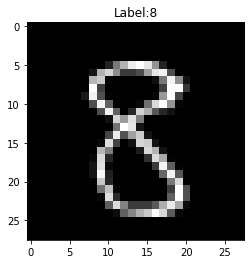

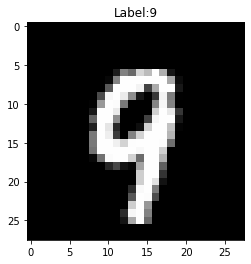

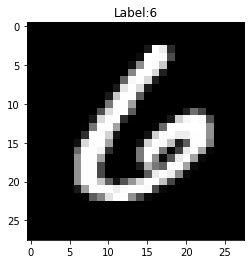

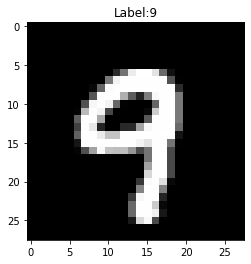

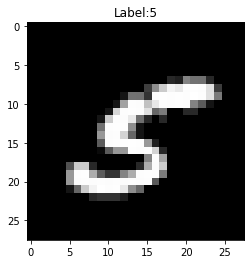

In [14]:
# Step 10: Visualize the first 5 images (if applicable)
import matplotlib.pyplot as plt
if X.shape[1]>=28*28:
    for i in range(5):
        plt.imshow(X[i].reshape(28,28),cmap='gray')
        plt.title(f"Label:{Y[i]}")
        plt.show()
        


In [19]:
# Step 11: Split dataset into train (75%) and validation (25%)
from sklearn.model_selection import train_test_split
X_test,X_valid,y_test,y_valid=train_test_split(X,Y,test_size=0.3)
print(X_test.shape,X_valid.shape,y_test.shape,y_valid.shape)

(2940, 784) (1260, 784) (2940,) (1260,)


In [21]:
# Step 12,13: Fit KNN classifier to training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_valid, y_valid)

KNeighborsClassifier()

In [23]:
# Step 14: Predict validation set results
y_pred=knn.predict(X_test)


In [45]:
# Step 15: Print the confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
con=confusion_matrix(y_test,y_pred)
print("confusion mat",con)

confusion mat [[309   0   0   0   1   1   1   0   0   1]
 [  0 362   0   0   0   0   0   0   0   0]
 [  5  44 288   6   7   2   3  16   7   2]
 [  2  14   2 303   0  12   0   6  12   3]
 [  0  11   0   0 246   0   3   3   1  59]
 [  7  13   0  22   3 224   5   0   2   4]
 [  6   3   0   0   2   2 309   0   0   0]
 [  0  13   1   0  11   4   2 288   1  15]
 [  8  25   9  15   4  11   3   2 259  10]
 [  5   4   0   5  17   0   1  18   2 293]]


In [46]:
# Step 16: Print classification report and accuracy
cl=classification_report(y_pred,y_test)
ac=accuracy_score(y_pred,y_test)
print("classify",cl)
print("acc",ac)

classify               precision    recall  f1-score   support

           0       0.99      0.90      0.94       342
           1       1.00      0.74      0.85       489
           2       0.76      0.96      0.85       300
           3       0.86      0.86      0.86       351
           4       0.76      0.85      0.80       291
           5       0.80      0.88      0.84       256
           6       0.96      0.94      0.95       327
           7       0.86      0.86      0.86       333
           8       0.75      0.91      0.82       284
           9       0.85      0.76      0.80       387

    accuracy                           0.86      3360
   macro avg       0.86      0.87      0.86      3360
weighted avg       0.87      0.86      0.86      3360

acc 0.8574404761904761


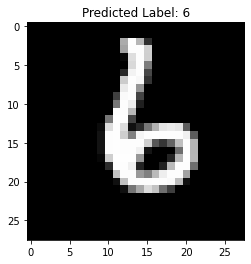

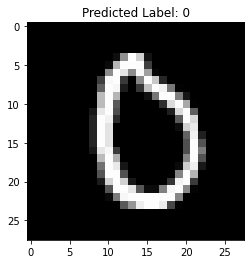

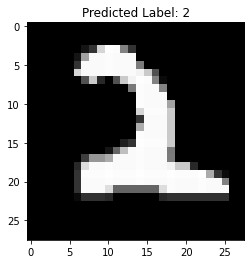

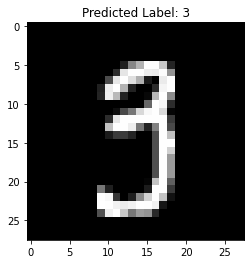

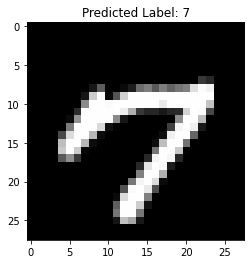

In [52]:
# Step 17: Visualize the first 5 test images with predicted labels (if applicable)
if X_test.shape[1] >= 28 * 28:
    for i in range(5):
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted Label: {y_pred[i]}")
        plt.show()
